## Classification using SSD model

In this demo, we will implement classification with ssd model.

We have trained this model for 10000 steps.

In [2]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import cv2
# import tarfile
import tensorflow as tf
# import zipfile
 
from collections import defaultdict
from io import StringIO
from PIL import Image
 
%matplotlib inline
#sys.path.append("..")
 
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
 
from matplotlib import pyplot as plt
 
PATH_TO_CKPT = 'frozen_inference_graph.pb'
 
PATH_TO_LABELS = 'pascal_label_map.pbtxt'
 
NUM_CLASSES = 20
 
#load model
detection_graph = tf.Graph() 
with detection_graph.as_default(): 
  od_graph_def = tf.GraphDef() 
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid: 
    serialized_graph = fid.read() 
    od_graph_def.ParseFromString(serialized_graph) 
    tf.import_graph_def(od_graph_def, name='')
    #for node in od_graph_def.node: 
    #    print (node.name)
 
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES,
                                                            use_display_name=True)
category_index = label_map_util.create_category_index(categories)
 
 
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)
 
 
PATH_TO_TEST_IMAGES_DIR = 'object_detection/test_images'
TEST_IMAGE_PATHS = [os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 4)]  ##change
IMAGE_SIZE = (12, 8)
 
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
        
      # Actual detection.
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8,min_score_thresh=.5)
     
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)

UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node FeatureExtractor/InceptionV2/InceptionV2/Conv2d_1a_7x7/separable_conv2d (defined at <ipython-input-2-08dc304597b1>:35) ]]
	 [[node Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Reshape_3 (defined at <ipython-input-2-08dc304597b1>:35) ]]

Caused by op 'FeatureExtractor/InceptionV2/InceptionV2/Conv2d_1a_7x7/separable_conv2d', defined at:
  File "D:\anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\anaconda\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "D:\anaconda\lib\site-packages\tornado\platform\asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "D:\anaconda\lib\asyncio\base_events.py", line 539, in run_forever
    self._run_once()
  File "D:\anaconda\lib\asyncio\base_events.py", line 1775, in _run_once
    handle._run()
  File "D:\anaconda\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "D:\anaconda\lib\site-packages\tornado\ioloop.py", line 758, in _run_callback
    ret = callback()
  File "D:\anaconda\lib\site-packages\tornado\stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\anaconda\lib\site-packages\tornado\gen.py", line 1233, in inner
    self.run()
  File "D:\anaconda\lib\site-packages\tornado\gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "D:\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "D:\anaconda\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "D:\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "D:\anaconda\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "D:\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "D:\anaconda\lib\site-packages\tornado\gen.py", line 326, in wrapper
    yielded = next(result)
  File "D:\anaconda\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "D:\anaconda\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "D:\anaconda\lib\site-packages\IPython\core\async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-08dc304597b1>", line 35, in <module>
    tf.import_graph_def(od_graph_def, name='')
  File "D:\anaconda\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "D:\anaconda\lib\site-packages\tensorflow\python\framework\importer.py", line 442, in import_graph_def
    _ProcessNewOps(graph)
  File "D:\anaconda\lib\site-packages\tensorflow\python\framework\importer.py", line 235, in _ProcessNewOps
    for new_op in graph._add_new_tf_operations(compute_devices=False):  # pylint: disable=protected-access
  File "D:\anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 3433, in _add_new_tf_operations
    for c_op in c_api_util.new_tf_operations(self)
  File "D:\anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 3433, in <listcomp>
    for c_op in c_api_util.new_tf_operations(self)
  File "D:\anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 3325, in _create_op_from_tf_operation
    ret = Operation(c_op, self)
  File "D:\anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

UnknownError (see above for traceback): Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node FeatureExtractor/InceptionV2/InceptionV2/Conv2d_1a_7x7/separable_conv2d (defined at <ipython-input-2-08dc304597b1>:35) ]]
	 [[node Postprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Reshape_3 (defined at <ipython-input-2-08dc304597b1>:35) ]]


In [2]:
%matplotlib inline

## Classification using faster-cnn model


We have trained this model for 1000 steps.

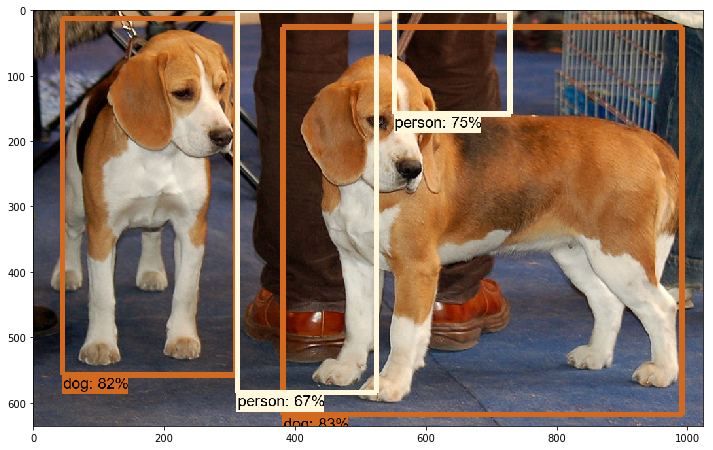

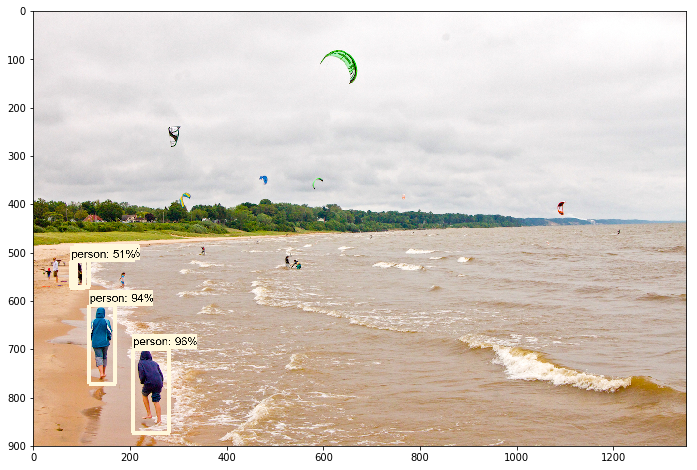

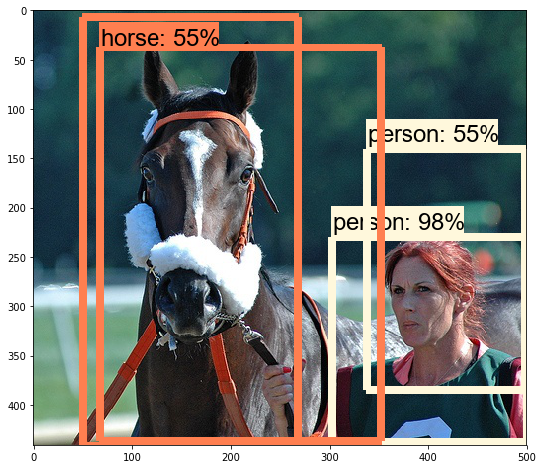

In [4]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import cv2
# import tarfile
import tensorflow as tf
# import zipfile
 
from collections import defaultdict
from io import StringIO
from PIL import Image
 
%matplotlib inline
#sys.path.append("..")
 
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
 
from matplotlib import pyplot as plt
 
PATH_TO_CKPT = 'object_detection/voc/export/frozen_inference_graph2.pb'
 
PATH_TO_LABELS = 'object_detection/voc/pascal_label_map.pbtxt'
 
NUM_CLASSES = 20
 
#load model
detection_graph = tf.Graph() 
with detection_graph.as_default(): 
  od_graph_def = tf.GraphDef() 
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid: 
    serialized_graph = fid.read() 
    od_graph_def.ParseFromString(serialized_graph) 
    tf.import_graph_def(od_graph_def, name='')
    #for node in od_graph_def.node: 
    #    print (node.name)
 
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES,
                                                            use_display_name=True)
category_index = label_map_util.create_category_index(categories)
 
 
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)
 
 
PATH_TO_TEST_IMAGES_DIR = '/project/models-master/research/object_detection/test_images'
TEST_IMAGE_PATHS = [os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 4)]  ##change
IMAGE_SIZE = (12, 8)
 
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
        
      # Actual detection.
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8,min_score_thresh=.5)
     
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)